In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
%matplotlib inline

In [2]:
zip = gpd.read_file('../data/zipcodes.geojson')

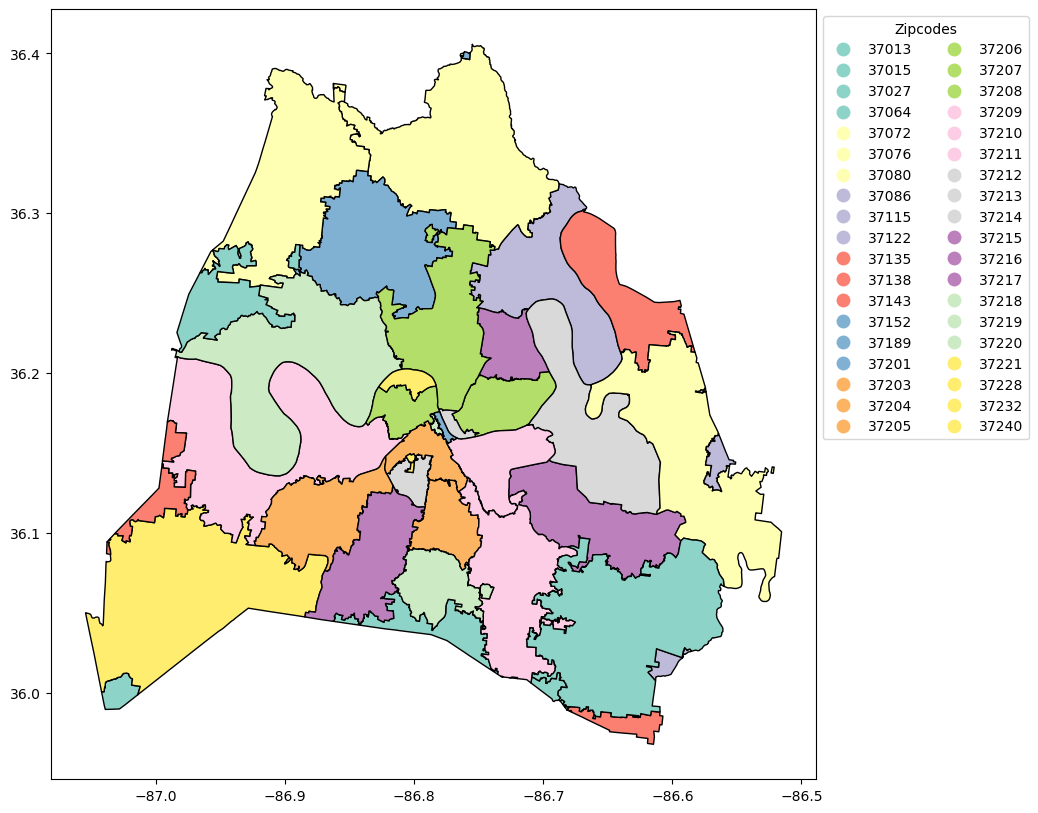

In [3]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1), 'ncol': 2}

zip.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set3')
plt.show();

In [4]:
nash_zip = zip.loc[zip['po_name'] == 'NASHVILLE']
nash_zip.reset_index()

,index,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
1,2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
2,7,37221,17,NASHVILLE,241372.3112694624,1266395059.4877319,"MULTIPOLYGON (((-86.97084 36.11644, -86.97084 ..."
3,9,37212,54,NASHVILLE,58759.243654332378,73920091.147705078,"MULTIPOLYGON (((-86.80790 36.14643, -86.80605 ..."
4,12,37209,10,NASHVILLE,310224.91345860378,1001364029.2892456,"MULTIPOLYGON (((-86.97543 36.20877, -86.97221 ..."
5,13,37206,2,NASHVILLE,75782.862116030214,221537063.58166504,"MULTIPOLYGON (((-86.75348 36.16274, -86.75383 ..."
6,17,37217,56,NASHVILLE,179866.56847992647,517579208.08972168,"MULTIPOLYGON (((-86.67355 36.12729, -86.66687 ..."
7,19,37207,49,NASHVILLE,14456.130686344946,6987521.0933837891,"MULTIPOLYGON (((-86.78596 36.29097, -86.78595 ..."
8,24,37219,15,NASHVILLE,21013.192337432083,6579013.4385986328,"MULTIPOLYGON (((-86.78609 36.17465, -86.78585 ..."
9,27,37218,55,NASHVILLE,253501.29953687743,1071962039.8548584,"MULTIPOLYGON (((-86.88231 36.26248, -86.88270 ..."


In [5]:
project = zip.iloc[[0,1,2,7,8,9,12,13,15,17,18,19,22,24,26,27,28,31,32,35,36,37,40,42,44,45,46,47,49,53]]
project.sort_values('zip')

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
26,37072,46,GOODLETTSVILLE,2648.6850248323294,416047.455078125,"MULTIPOLYGON (((-86.76191 36.39867, -86.76200 ..."
15,37072,45,GOODLETTSVILLE,9724.5061842441155,3337338.4436035156,"MULTIPOLYGON (((-86.85290 36.38014, -86.85327 ..."
8,37072,47,GOODLETTSVILLE,225242.45424953851,1094968706.7701416,"MULTIPOLYGON (((-86.75361 36.40428, -86.75354 ..."
46,37076,53,HERMITAGE,291751.42832600401,983805973.83410645,"MULTIPOLYGON (((-86.57085 36.13534, -86.57099 ..."
28,37076,52,HERMITAGE,3786.7098050626546,675823.34777832031,"MULTIPOLYGON (((-86.52159 36.13816, -86.52174 ..."
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
22,37138,51,OLD HICKORY,133803.10728562382,398431173.90905762,"MULTIPOLYGON (((-86.61068 36.24413, -86.61039 ..."
18,37189,50,WHITES CREEK,212443.88846785942,693260660.63964844,"MULTIPOLYGON (((-86.84400 36.32689, -86.83591 ..."
36,37201,14,NASHVILLE,25670.555742711778,11151362.94934082,"MULTIPOLYGON (((-86.77973 36.17460, -86.77823 ..."
35,37203,33,NASHVILLE,91285.438580354588,120649702.5546875,"MULTIPOLYGON (((-86.78734 36.16688, -86.78711 ..."


<Axes: >

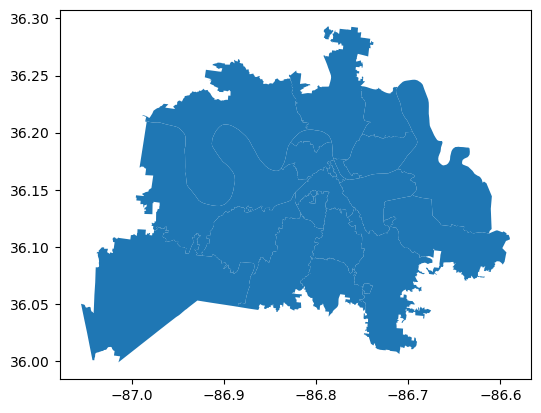

In [6]:
nash_zip.plot()

In [7]:
nash_not = zip.loc[zip['po_name'] != 'NASHVILLE']
nash_not.reset_index()

,index,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
2,4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."
3,5,37143,23,PEGRAM,7047.8267580476522,1900364.756652832,"MULTIPOLYGON (((-87.03553 36.08659, -87.03556 ..."
4,6,37080,42,JOELTON,2319.8074237329579,56522.611450195313,"MULTIPOLYGON (((-86.86263 36.37811, -86.86264 ..."
5,8,37072,47,GOODLETTSVILLE,225242.45424953851,1094968706.7701416,"MULTIPOLYGON (((-86.75361 36.40428, -86.75354 ..."
6,10,37135,7,NOLENSVILLE,69742.56063023665,74707266.403198242,"MULTIPOLYGON (((-86.67188 35.98955, -86.67189 ..."
7,11,37027,31,BRENTWOOD,3116.4327152718852,304596.06201171875,"MULTIPOLYGON (((-86.72012 36.00886, -86.72012 ..."
8,14,37027,30,BRENTWOOD,30401.649619169264,24460979.921020508,"MULTIPOLYGON (((-86.68705 36.01059, -86.68695 ..."
9,15,37072,45,GOODLETTSVILLE,9724.5061842441155,3337338.4436035156,"MULTIPOLYGON (((-86.85290 36.38014, -86.85327 ..."


<Axes: >

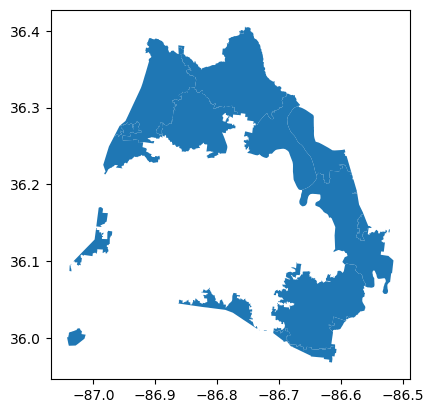

In [8]:
nash_not.plot()

In [9]:
project = project.sort_values('zip')

In [10]:
project = project.reset_index(drop=True)

<Axes: >

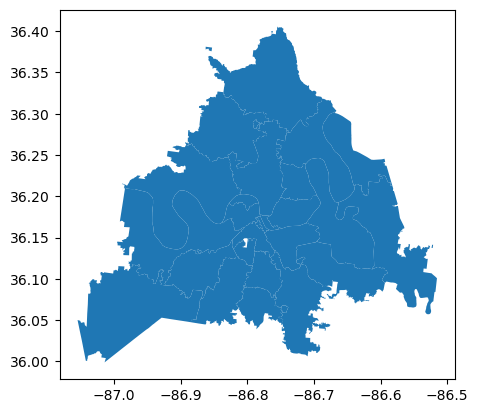

In [11]:
project.plot()


In [12]:
project


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37072,46,GOODLETTSVILLE,2648.6850248323294,416047.455078125,"MULTIPOLYGON (((-86.76191 36.39867, -86.76200 ..."
1,37072,45,GOODLETTSVILLE,9724.5061842441155,3337338.4436035156,"MULTIPOLYGON (((-86.85290 36.38014, -86.85327 ..."
2,37072,47,GOODLETTSVILLE,225242.45424953851,1094968706.7701416,"MULTIPOLYGON (((-86.75361 36.40428, -86.75354 ..."
3,37076,53,HERMITAGE,291751.42832600401,983805973.83410645,"MULTIPOLYGON (((-86.57085 36.13534, -86.57099 ..."
4,37076,52,HERMITAGE,3786.7098050626546,675823.34777832031,"MULTIPOLYGON (((-86.52159 36.13816, -86.52174 ..."
5,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
6,37138,51,OLD HICKORY,133803.10728562382,398431173.90905762,"MULTIPOLYGON (((-86.61068 36.24413, -86.61039 ..."
7,37189,50,WHITES CREEK,212443.88846785942,693260660.63964844,"MULTIPOLYGON (((-86.84400 36.32689, -86.83591 ..."
8,37201,14,NASHVILLE,25670.555742711778,11151362.94934082,"MULTIPOLYGON (((-86.77973 36.17460, -86.77823 ..."
9,37203,33,NASHVILLE,91285.438580354588,120649702.5546875,"MULTIPOLYGON (((-86.78734 36.16688, -86.78711 ..."


project.to_file('nashygeo.json')

<Axes: >

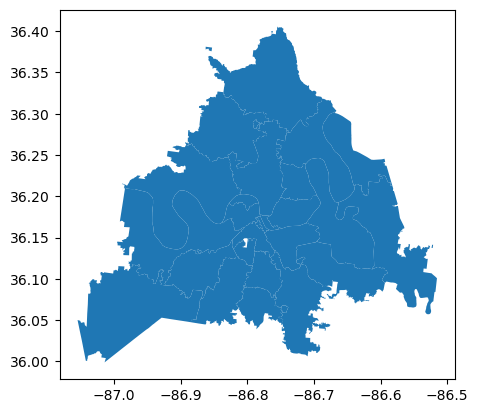

In [13]:
project.plot()

In [30]:
project.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

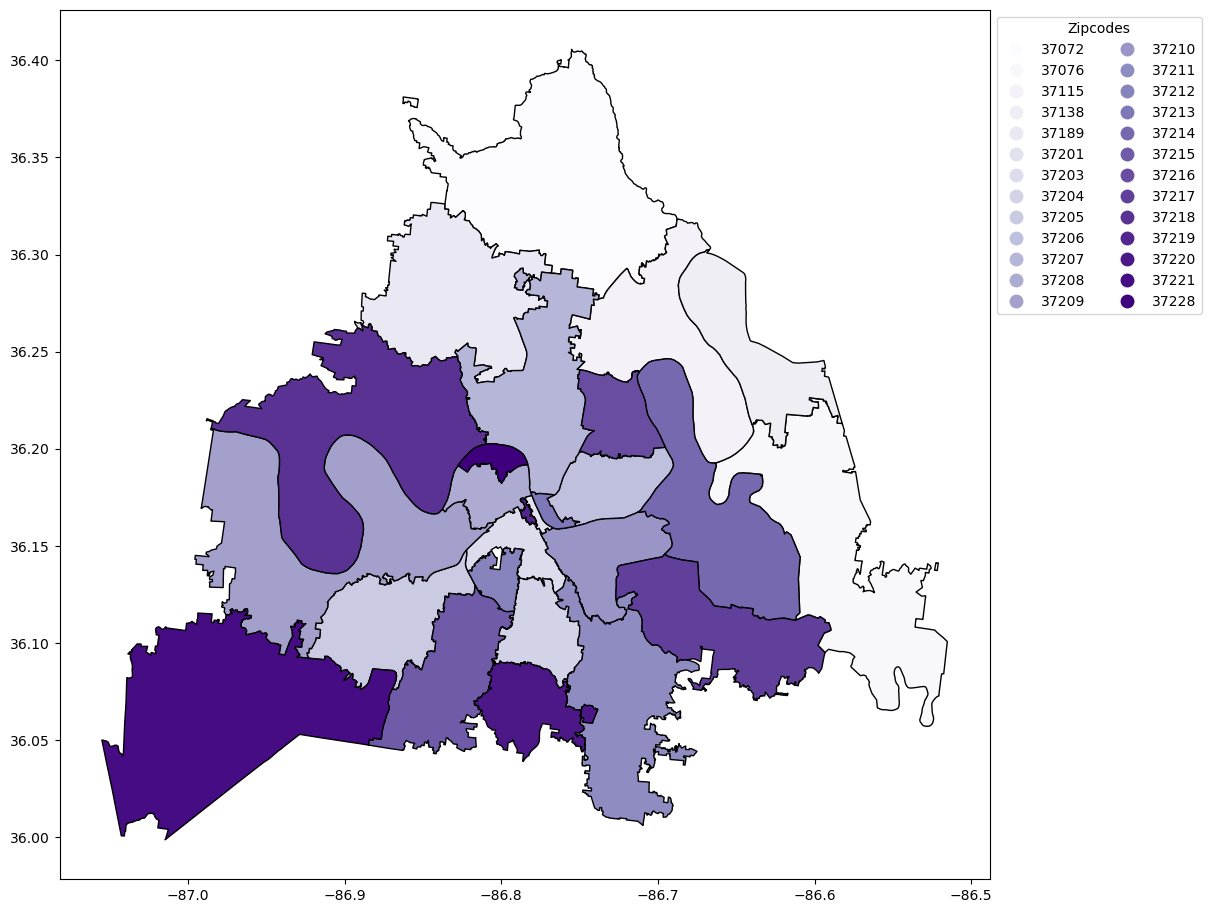

In [15]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1), 'ncol': 2}

project.plot(column = 'zip', figsize=(12, 12),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Purples')
plt.show();

In [86]:
fireclean = pd.read_csv('fire_clean.csv')
print(fireclean.shape)
fireclean.head()

(40, 6)


,Station Number,Street Address,City,State,ZIP Code,coord
0,Station 4,5111 Harding Place,Nashville,TN,37211,"(36.089971986, -86.687167979)"
1,Station 3,840 Meridian Avenue,Nashville,TN,37207,"(36.186575012, -86.768455006)"
2,Station 7,638 Davidson Road,Nashville,TN,37205,"(36.117906019, -86.88698903)"
3,Station 34,8350 Highway 70 South,Nashville,TN,37221,"(36.092133008, -86.982673987)"
4,Station 33,2501 Forest View Drive,Antioch,TN,37013,"(36.067409998, -86.630679987)"


In [97]:
firegeo = gpd.GeoDataFrame(fireclean, crs = project.crs, geometry = gpd.points_from_xy(float(fireclean.coord[1]), float(fireclean.coord[0])))

ValueError: could not convert string to float: '(36.186575012, -86.768455006)'

In [48]:
library = pd.read_csv('library_clean.csv')

In [49]:
library = library[['Library Name', 'address', 'city_state_zip', 'coords']]

In [50]:
library.head()


,Library Name,address,city_state_zip,coords
0,East,206 Gallatin Avenue,"Nashville, TN 37206","(36.17912, -86.750438)"
1,Hadley Park,"1039 28th Ave., North","Nashville, TN 37208","(36.166888, -86.820526)"
2,Inglewood,4312 Gallatin Pike,"Nashville, TN 37216","(36.225814, -86.725447)"
3,Richland Park,4711 Charlotte Avenue,"Nashville, TN 37209","(36.152105, -86.84438)"
4,Main,615 Church Street,"Nashville, TN 37219","(36.162414, -86.781895)"


In [51]:
mss = pd.read_csv('metro_soc_services_clean.csv')

In [52]:
mss = mss[['Organization Name', 'Address', 'City', 'State', 'Zip Code', 'coords']]
mss.head()

,Organization Name,Address,City,State,Zip Code,coords
0,Metro Social Services,930 Industrial Blouvard,Old Hickory,Tennessee,37138,"(36.264344992, -86.658196015)"
1,Metro Social Services,100 Curtis Hollow Road,Antioch,Tennessee,37013,"(36.051782, -86.65031)"
2,Metro Social Services,1310 Coreland Drive,Madison,Tennessee,37115,"(36.244961, -86.717089)"
3,Metro Social Services,600 Woodland St,Nashville,Tennessee,37206,"(36.173412, -86.760625)"
4,Metro Social Services,301 Madison Street,Madison,Tennessee,37115,"(36.25896, -86.717294)"


In [55]:
pharm = pd.read_csv('pharmaceutical_disposal_clean.csv')

In [58]:
pharm = pharm[['Drop-Off Site', 'Street Address', 'zip', 'coords']]
pharm

,Drop-Off Site,Street Address,zip,coords
0,East Precinct,936 East Trinity Lane,37207,"(36.204518, -86.748091)"
1,Hermitage Precinct,3701 James Kay Lane,37076,"(36.177823, -86.615123)"
2,Central Precinct ...,601 Korean Veterans Blvd.,37203,"(36.155688, -86.777522)"
3,West Precinct,5500 Charlotte Pike,37209,"(36.150806, -86.855196)"
4,North Precinct,2231 26th Ave North,37208,"(36.189669, -86.817973)"
5,Midtown Hills Precinct,1443 12th Ave. South,37203,"(36.136965, -86.788375)"
6,Madison Precinct,400 Myatt Drive,37115,"(36.272475, -86.68954)"
7,South Precinct,5101 Harding Place,37211,"(36.08991, -86.688058)"


In [59]:
health = pd.read_csv('public_health_clinics_clean.csv')

(4, 6)


,Clinic Name,Phone,Hours,address,city,coords
0,East Public Health Center,(615) 862-7916,Monday - Friday 7:30 am until 4:30 pm,1015 East Trinity Lane,"Nashville, TN","(36.204273, -86.745286)"


In [62]:
health = health[['Clinic Name', 'address', 'city', 'coords']]
health

,Clinic Name,address,city,coords
0,East Public Health Center,1015 East Trinity Lane,"Nashville, TN","(36.204273, -86.745286)"
1,Woodbine Public Health Center,224 Oriel Avenue,"Nashville, TN","(36.122097, -86.743627)"
2,Lentz Public Health Center,2500 Charlotte Avenue,"Nashville, TN","(36.155043, -86.812991)"
3,South Nashville WIC Nutrition Center (WIC Only),3718 Nolensville Pike,"Nashville, TN","(36.093667, -86.736409)"


In [33]:
safety = pd.read_csv('public_safety_locations_clean.csv')
print(safety.shape)
safety.head(1)

(48, 9)


,Resource Name/Number,Resource Type,Street Address,City,State,Zip Code,address,city,coords
0,Station 12,Fire Station,101 Polk Avenue,Nashville,TN,37210,101 Polk Avenue,"Nashville, TN 37210","(36.141361, -86.742942)"


In [66]:
safety = safety[['Resource Name/Number', 'Resource Type', 'Street Address', 'City',
       'State', 'Zip Code', 'coords']]
safety

,Resource Name/Number,Resource Type,Street Address,City,State,Zip Code,coords
0,Station 12,Fire Station,101 Polk Avenue,Nashville,TN,37210,"(36.141361, -86.742942)"
1,Station 8,Fire Station,2010 12th Avenue South,Nashville,TN,37212,"(36.133044, -86.78875)"
2,Station 19,Fire Station,349 21st Avenue North,Nashville,TN,37203,"(36.156509, -86.806429)"
3,Station 10,Fire Station,15530 Old Hickory Blvd.,Nashville,TN,37211,"(36.039834, -86.740496)"
4,Station 36,Fire Station,1000 Donelson Street,Old Hickory,TN,37138,"(36.264093, -86.648087)"
5,Station 21,Fire Station,320 Joyner Avenue,Nashville,TN,37211,"(36.116466, -86.747067)"
6,Station 32,Fire Station,4031 Plantation Drive,Hermitage,TN,37076,"(36.20044, -86.621467)"
7,Station 20,Fire Station,1626 Harding Place,Nashville,TN,37215,"(36.0911, -86.82559)"
8,Station 39,Fire Station,1247 South Dickerson Road,Goodlettsville,TN,37072,"(36.290544, -86.738286)"
9,Station 13,Fire Station,410 45th Avenue North,Nashville,TN,37209,"(36.153027, -86.840928)"


In [75]:
fire = safety.loc[safety['Resource Type'] == 'Fire Station']
fire

,Resource Name/Number,Resource Type,Street Address,City,State,Zip Code,coords
0,Station 12,Fire Station,101 Polk Avenue,Nashville,TN,37210,"(36.141361, -86.742942)"
1,Station 8,Fire Station,2010 12th Avenue South,Nashville,TN,37212,"(36.133044, -86.78875)"
2,Station 19,Fire Station,349 21st Avenue North,Nashville,TN,37203,"(36.156509, -86.806429)"
3,Station 10,Fire Station,15530 Old Hickory Blvd.,Nashville,TN,37211,"(36.039834, -86.740496)"
4,Station 36,Fire Station,1000 Donelson Street,Old Hickory,TN,37138,"(36.264093, -86.648087)"
5,Station 21,Fire Station,320 Joyner Avenue,Nashville,TN,37211,"(36.116466, -86.747067)"
6,Station 32,Fire Station,4031 Plantation Drive,Hermitage,TN,37076,"(36.20044, -86.621467)"
7,Station 20,Fire Station,1626 Harding Place,Nashville,TN,37215,"(36.0911, -86.82559)"
8,Station 39,Fire Station,1247 South Dickerson Road,Goodlettsville,TN,37072,"(36.290544, -86.738286)"
9,Station 13,Fire Station,410 45th Avenue North,Nashville,TN,37209,"(36.153027, -86.840928)"


In [74]:
police = safety.loc[safety['Resource Type'] == 'Police Precinct']
police

,Resource Name/Number,Resource Type,Street Address,City,State,Zip Code,coords
24,Midtown Hills Precinct,Police Precinct,1441 12th Avenue South,Nashville,TN,37203,"(36.137312, -86.788264)"
27,Madison Precinct,Police Precinct,400 Myatt Dr.,Madison,TN,37115,"(36.272475, -86.68954)"
30,Hermitage Precinct,Police Precinct,3701 James Kay Lane,Hermitage,TN,37076,"(36.177823, -86.615122)"
32,West Precinct,Police Precinct,5500 Charlotte Pike,Nashville,TN,37209,"(36.150829, -86.855095)"
37,North Precinct,Police Precinct,2231 26th Ave. North,Nashville,TN,37208,"(36.189673, -86.817971)"
43,Central Precinct,Police Precinct,601 Korean Veterans Blvd.,Nashville,TN,37203,"(36.15567, -86.777558)"
46,East Precinct,Police Precinct,936 E. Trinity Lane,Nashville,TN,37207,"(36.204513, -86.748032)"
47,South Precinct,Police Precinct,5101 Harding Place,Nashville,TN,37211,"(36.089618, -86.688491)"


In [34]:
wifi = pd.read_csv('wifi_clean.csv')
print(wifi.shape)
wifi.head(1)

(103, 10)


,Site Name,Site Type,Street Address,City,State,ZIP,Mapped Location,address,city_zip,coodrs
0,Andrew Jackson Courts,Public Gathering,1457 Jackson Street,Nashville,TN,37208,"1457 Jackson Street\nNashville, TN 37208\n(36....",1457 Jackson Street,"Nashville, TN 37208","(36.167733, -86.800501)"


In [78]:
wifi = wifi[['Site Name', 'Site Type', 'Street Address', 'City', 'State', 'ZIP', 'coodrs']]
wifi

,Site Name,Site Type,Street Address,City,State,ZIP,coodrs
0,Andrew Jackson Courts,Public Gathering,1457 Jackson Street,Nashville,TN,37208,"(36.167733, -86.800501)"
1,Antioch Community Center,Regional Community Center,5023 Blue Hole Road,Antioch,TN,37013,"(36.055271, -86.672392)"
2,Azafran Park,Public Gathering,2187 Nolensville Pike,Nashville,TN,37211,"(36.127313, -86.753363)"
3,Beaman Nature Center,Regional Community Center,5911 Old Hickory Blvd,Nashville,TN,37015,"(36.260013, -86.893379)"
4,Bellevue Community Center,Regional Community Center,656 Colice Jeanne Road,Nashville,TN,37221,"(36.072144, -86.934617)"
...,...,...,...,...,...,...,...
98,Watkins Library,Library,612 17th Avenue North,Nashville,TN,37203,"(36.16275, -86.80084)"
99,West Community Center,Regional Community Center,6105 Morrow Road,Nashville,TN,37209,"(36.163446, -86.863055)"
100,West Police Precinct - Community Room,Public Gathering,5500 Charlotte Pike,Nashville,TN,37209,"(36.150829, -86.855095)"
101,West Riverfront Park,Public Gathering,310 1st Ave South,Nashville,TN,37201,"(36.159153, -86.772422)"


In [79]:
water = pd.read_csv('../data/WaterFountains_HydrationSystems.csv')
print(water.shape)
water.head(10)

(73, 10)


,the_geom,OBJECTID,LAT,NAME,LON,Location,Dog,FeatType,Cnt,ADA
0,POINT (-86.89425345576078 36.26250455840148),45921,-86.894253,Beaman Water Fountain,36.262505,NaN,Y,Fountain/Bottle filler/ADA,1,Y
1,POINT (-86.90622747033689 36.06089914863129),45937,-86.906227,Edwin Nature Center Water Fountain,36.060899,Restrooms Breezeway,N,Bottle Filler/ADA,1,Y
2,POINT (-86.86727565917963 36.08310102493863),45964,-86.867276,Percy Warner Belle Meade Gates Water Fountain,36.083101,Belle Meade Gates,Y,ADA Bowl,1,Y
3,POINT (-86.8637899391243 36.161795831166906),45992,-86.863790,West Park Water Fountain,36.161796,Ballfield,N,Single with foot pedal,1,N
4,POINT (-86.84589094125035 36.151393836128406),46012,-86.845891,Richland Park Water Fountain,36.151394,Playground,N,Single with foot pedal,1,N
5,POINT (-86.812796927121 36.147179847789246),46063,-86.812797,Centennial Water Fountain,36.147180,Large Picnic Shelter CPAS,Y,Bottle Filler/ADA,1,Y
6,POINT (-86.80604491107205 36.137148846094306),46091,-86.806045,Fannie Mae Dees Water Fountain,36.137149,Playground,N,Standard/ADA/Bottle Filler,1,N
7,POINT (-86.80615988848005 36.13615282281186),46092,-86.806160,Fannie Mae Dees Water Fountain,36.136153,Tennis Court,N,Standard/ADA/Bottle Filler,1,N
8,POINT (-86.76095191593977 36.18696883428431),46154,-86.760952,Cleveland Water Fountain,36.186969,Basketball Court,N,Single with foot pedal,1,N
9,POINT (-86.73899389419367 36.06665983110002),46190,-86.738994,Whitfield Water Fountain,36.066660,Middle of Ball Diamonds,N,Single with foot pedal,1,N


In [85]:
water = water[['the_geom', 'NAME', 'LAT', 'LON', 'Location', 'ADA']]
water

,the_geom,NAME,LAT,LON,Location,ADA
0,POINT (-86.89425345576078 36.26250455840148),Beaman Water Fountain,-86.894253,36.262505,NaN,Y
1,POINT (-86.90622747033689 36.06089914863129),Edwin Nature Center Water Fountain,-86.906227,36.060899,Restrooms Breezeway,Y
2,POINT (-86.86727565917963 36.08310102493863),Percy Warner Belle Meade Gates Water Fountain,-86.867276,36.083101,Belle Meade Gates,Y
3,POINT (-86.8637899391243 36.161795831166906),West Park Water Fountain,-86.863790,36.161796,Ballfield,N
4,POINT (-86.84589094125035 36.151393836128406),Richland Park Water Fountain,-86.845891,36.151394,Playground,N
...,...,...,...,...,...,...
68,POINT (-86.94508440808808 36.058992725162675),Harpeth River Greenway,-86.945084,36.058993,Morton Mill Rd at Old Harding Pike,N
69,POINT (-86.91617133563244 36.05133033361339),Harpeth River Greenway,-86.916171,36.051330,Butler Field Trail Head,N
70,POINT (-86.77223046556308 36.16412160534988),River Landing,-86.772230,36.164122,Greenway @ Victory & Titans Ways,Y
71,POINT (-86.7712099827693 36.1601422664622),Ascend Amphiteater Water Fountain,-86.771210,36.160142,Building,N


In [91]:
water.crs

AttributeError: 'DataFrame' object has no attribute 'crs'